<a href="https://colab.research.google.com/github/karolinaprygiel/ai-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Wczytywanie danych

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/healthcare-dataset-stroke-data.csv')


### Rzućmy okiem na wczytane dane

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Opisy kolumn (zgodnie z opisem na stronie)
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient  doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dataset zawiera 12 kolumn i 5110 rekordów.<br>
Dataset zawiera zarówno dane dyskretne, ciągłe jak i tekstowe.
  


#Wizualizacja danych


##Przyjrzymy się danym kategorycznym

Text(0.5, 1.0, 'Czy palacz')

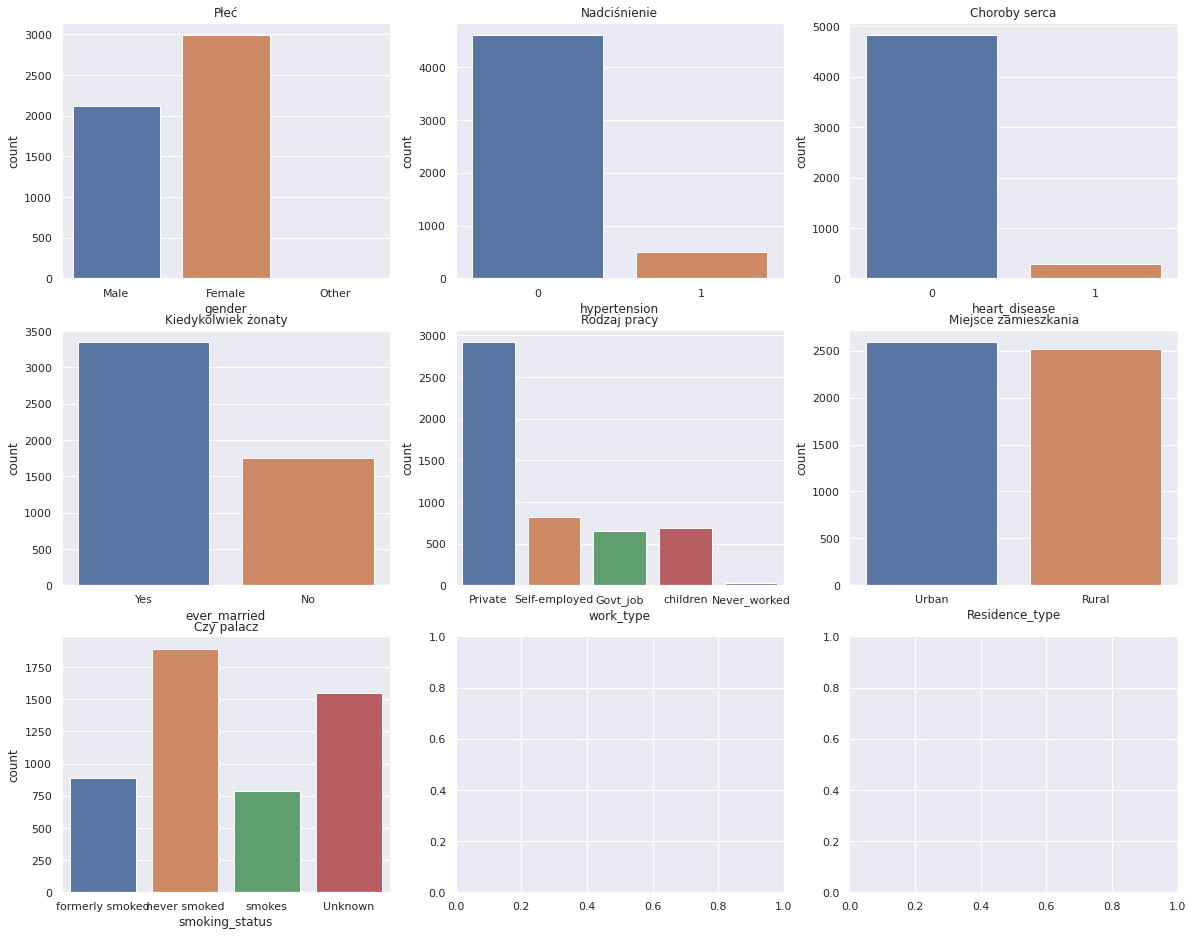

In [ ]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease', data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', data=data).set_title("Czy palacz")

####Wnioski


W datasecie jest więcej danych nt. mężczyzn, ale nie jest to różnica bardzo duża.<br>
Zdecydowana większość osób nie ma problemów z sercem ani nadciśnieiem.<br>
Większość danych dotyczy osób pracujących, będących w związku małżeńskim, w większości pracujących w sektorze prywatnym. <br>
Większość osób nigdy nie paliła, ale należy zwrócic uwagę na bardzo dużą ilość brakujących danych na ten temat.


##Podobnie spójrzmy teraz na dane liczbowe

###Wiek

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


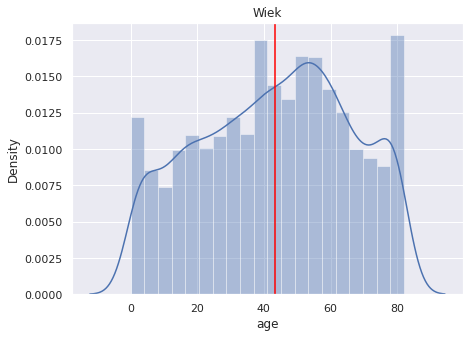

In [ ]:
fig = plt.figure(figsize = (7,5))
sns.distplot(data['age'], kde="True", ax=fig.gca()).set_title("Wiek")
plt.axvline(data['age'].mean(), color='red')


###BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


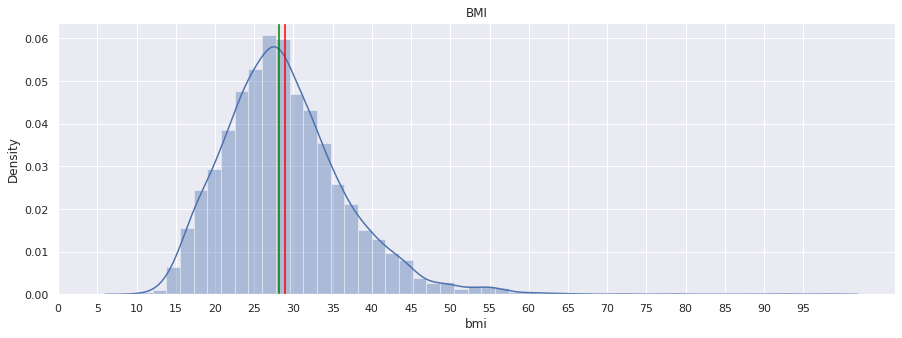

In [ ]:
fig = plt.figure(figsize = (15,5))
sns.distplot(data['bmi'], kde="True", ax=fig.gca()).set_title("BMI")
plt.xticks(np.arange(0,100,5))
plt.axvline(data['bmi'].mean(), color='red')
plt.axvline(data['bmi'].median(), color='green')


**NORMY BM**<br>
wygłodzenie – wynik poniżej 16,<br>
wychudzenie – wynik 16-16,9,<br>
niedowaga – wynik 17 - 18,5,<br>
prawidłowa waga – wynik 18,5-24,9,<br>
nadwaga – wynik powyżej 25-29,9,<br>
otyłość – wynik 30-34,9,<br>
otyłość kliniczna – wynik 35-39,9,<br>
otyłość skrajna – wynik powyżej 40<br>

In [ ]:
print((data[data["bmi"] > 40 ]).shape[0])
print((data[data["bmi"] > 50 ]).shape[0])

408
79


In [ ]:
data[(data["bmi"] >= 50 ) & (data["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.1,56.6,never smoked,1


###Poziom cukru we krwi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


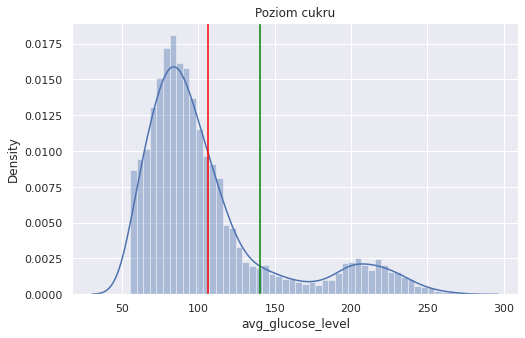

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.distplot(data['avg_glucose_level'], kde="True", ax=fig.gca()).set_title("Poziom cukru")
plt.axvline(data['avg_glucose_level'].mean(), color='red')
plt.axvline(140, color='green')


In [ ]:
glucose_levels = {'Poziom cukru' : ['< 140 mg/dL', 'Między 140 a 200 mg/dL ', '≥ 200 mg/dL'], 
                  'Interpretacja': ['Prawidłowy poziom glukozy', 'Nieprawidłowy poziom glukozy', 'Cukrzyca']}
glucose_levels_df = pd.DataFrame(glucose_levels)  
glucose_levels_df

,Poziom cukru,Interpretacja
0,< 140 mg/dL,Prawidłowy poziom glukozy
1,Między 140 a 200 mg/dL,Nieprawidłowy poziom glukozy
2,≥ 200 mg/dL,Cukrzyca


###Wnioski

Data set zawiera dane osób ze wszystkich grup wiekowych, ze średnią wieku 40 lat. <br>
BMI zachowuje rozkład normalny, ze średnią wskazującą na nadwagę, uwagę jednak zwraca, że niemal 10% osób jest skrajnie otyła (BMI powyżej 40).<br>
Większość osób ma cukier w normie, ale jest też spora ggrupa osób z cukrzycą.


Ze względu na to, że BMI powyżej 50 jest bardzo rzadkie, a mamy takich rekordów prawie 80, wśród których tylko 1 osoba miała udar, możemy usunąć te wartości.

In [ ]:
data.drop(data[data['bmi'] > 50].index, inplace = True)

##Dane kategoryczne vs Udar

Text(0.5, 1.0, 'Czy palacz')

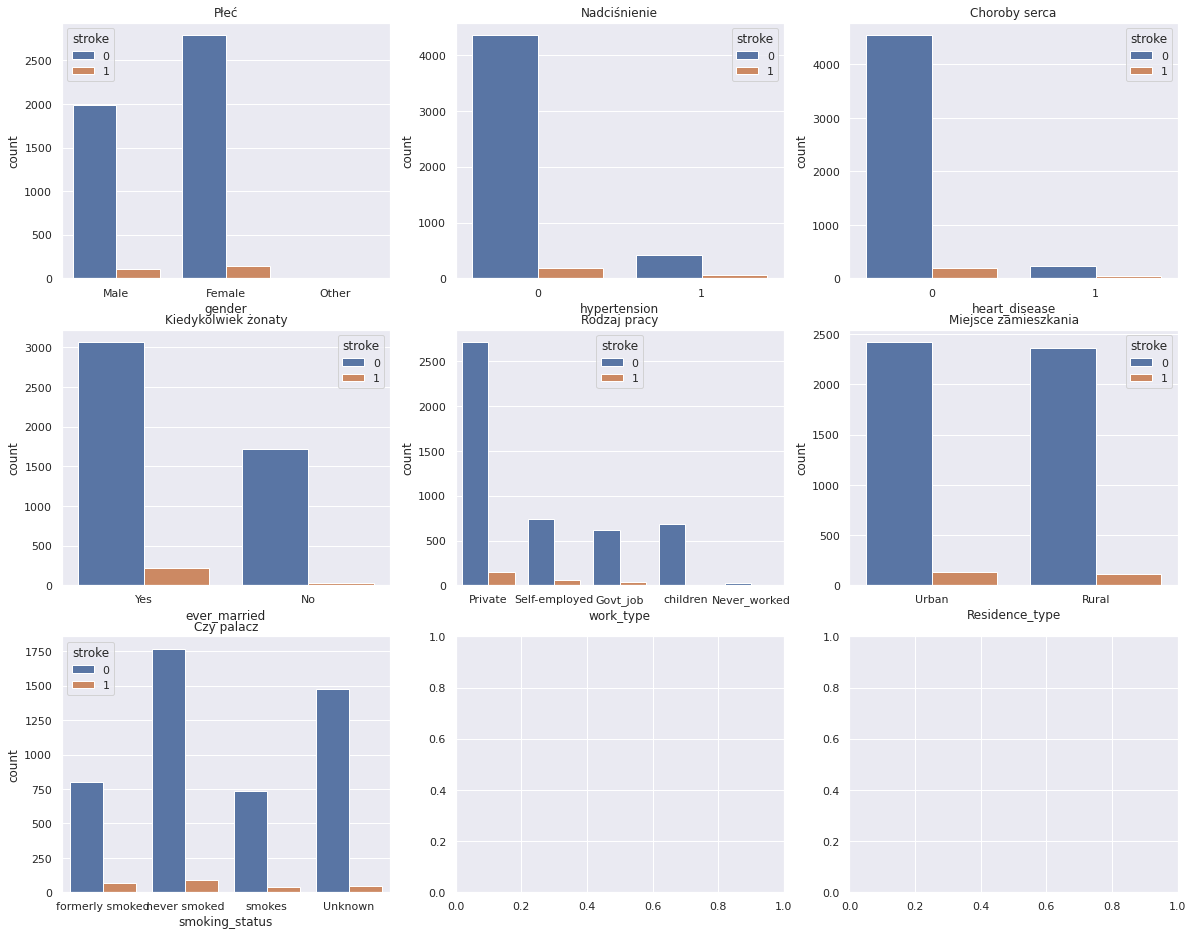

In [ ]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', hue="stroke", data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', hue="stroke", data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease',hue="stroke", data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', hue="stroke", data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', hue="stroke", data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', hue="stroke", data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', hue="stroke", data=data).set_title("Czy palacz")

### BMI VS Udar

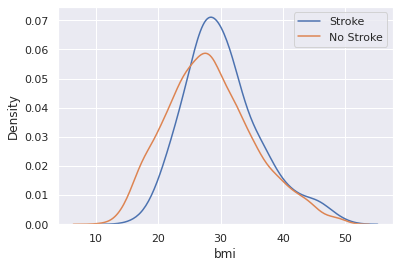

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['bmi'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['bmi'],label='No Stroke')
plt.legend()
plt.show()

###Wiek VS Udar

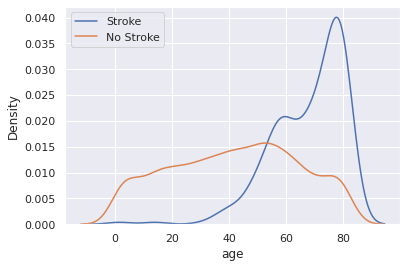

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['age'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['age'],label='No Stroke')
plt.legend()
plt.show()

Poziom cukru we krwi vs Udar

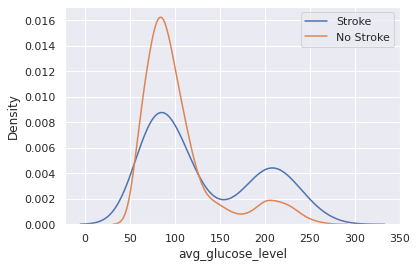

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['avg_glucose_level'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['avg_glucose_level'],label='No Stroke')
plt.legend()
plt.show()

###Wnioski

Widać bardzo dużą zależność pomiędzy wiekiek a wystąpieniem udaru. Zdecydowana większość osób z udarem, miała ponad 40 lat. <br>
Poziom cukru również zdaje się mieć wpływ na wystąpienie udaru. 

##Zbalansowanie danych

Text(0.5, 1.0, 'Stroke')

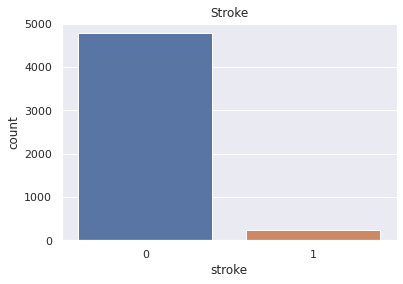

In [ ]:

sns.countplot(x='stroke', data=data).set_title("Stroke")

In [ ]:
data['stroke'].value_counts()

0    4783
1     248
Name: stroke, dtype: int64

Jak widzimy, dane są mocno niezbalansowane, czy będzie trzeba zająć się później.

###Korelacja

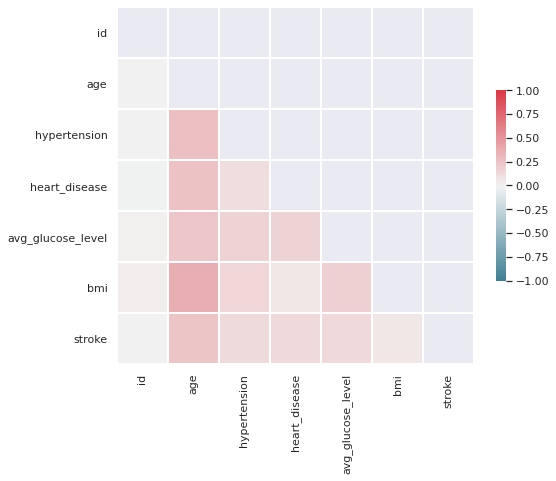

In [ ]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

Brak silnych korelacji

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,4830.000000,5031.000000
mean,36606.051878,43.187637,0.095607,0.054661,105.895828,28.444576,0.049294
std,21122.290839,22.729324,0.294081,0.227340,44.986836,7.011582,0.216503
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17864.500000,25.000000,0.000000,0.000000,77.250000,23.500000,0.000000
50%,37031.000000,45.000000,0.000000,0.000000,91.850000,27.900000,0.000000
75%,54751.500000,61.000000,0.000000,0.000000,113.910000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


##Przetwarzanie danych

Spójrzmy jeszcze raz na dane w poszczególnych kolumnach

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5031 non-null   int64  
 1   gender             5031 non-null   object 
 2   age                5031 non-null   float64
 3   hypertension       5031 non-null   int64  
 4   heart_disease      5031 non-null   int64  
 5   ever_married       5031 non-null   object 
 6   work_type          5031 non-null   object 
 7   Residence_type     5031 non-null   object 
 8   avg_glucose_level  5031 non-null   float64
 9   bmi                4830 non-null   float64
 10  smoking_status     5031 non-null   object 
 11  stroke             5031 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 671.0+ KB


**Możemy usunąć kolumnę id**

In [ ]:
data.drop(columns=['id'],inplace=True) 
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Kolumna gender zawiera tylko jeden rekord z wartością "other", który również możemy usunąć** 

In [ ]:
data["gender"].value_counts()

Female    2935
Male      2095
Other        1
Name: gender, dtype: int64

In [ ]:
data[data["gender"] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

##Problem missing data

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Wartości w kolumnie *bmi* brakuje w ponad 200 rekordach. To niemal 4% wszystkich danych.


Oprócz tego należy pamiętać o kolumnie smoking_status, w której ponad 1500 rekrdów przyjmowało wartość "Unknown".

###Zajmijmy się najpierw kolumną bmi.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


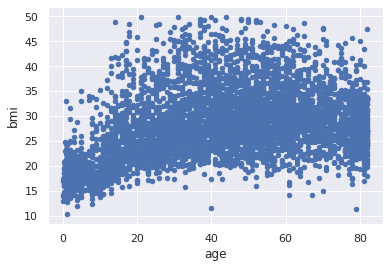

In [ ]:
data.plot(x='age', y='bmi', kind='scatter')
plt.show()

In [ ]:
print(data[data['gender']=="Male"]["bmi"].mean())
print(data[data['gender']=="Female"]["bmi"].mean())
print(data['bmi'].corr(data['age']))

28.333701657458597
28.524489076814703
0.37220372314233946


Widać korelację między BMI a wiekiem. Płeć zdaje się nie mieć dużego wpływu na BMI.<br>
Dlatego możemy uzupełnić brakujące dane w kolumnie BMI średnią dla swojej grupy wiekowej.

In [ ]:
# def mapAge(x):
#     if (x <= 10):
#         return 0
#     elif (x <=20):
#         return 1
#     elif (x <= 30):
#         return 2
#     else:
#         return 3
    
    
# data['age_group'] = data['age'].map(lambda x: mapAge(x))


In [ ]:
# bmi_groups = data[['age_group', 'bmi']].groupby(['age_group']).mean()
# bmi_groups

In [ ]:

# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 0)] = 18.9
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 1)] = 25.1
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 2)] = 27.9
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 3)] = 30.43

In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Kolumna smoking_status


Można przypuszczać, że to, czy osoba pali/paliła ma znaczny wpływ na wystąpienie udaru. Dlatego też, lepiej będzie usunąć te wiersze, które nie posiadają informacji na ten temat.

In [ ]:
data=data[data['smoking_status']!='Unknown']

In [ ]:
data.shape[0]

3507

##Mapowanie wartości zero-jedynkowych (płeć, stan cywilny, miejsce zamieszkania)

In [ ]:
print(data['gender'].unique())
print(data['ever_married'].unique())
print(data['Residence_type'].unique())

['Male' 'Female']
['Yes' 'No']
['Urban' 'Rural']


In [ ]:
def gender_mapping(x):
    if x == "Female":
        return 0
    else:
        return 1

def married_mapping(x):
    if x == "No":
        return 0
    else:
        return 1

def residence_mapping(x):
    if x == "Urban":
        return 0
    else:
        return 1

        

In [ ]:
data['gender'] = data['gender'].map(lambda x: gender_mapping(x))
data['ever_married'] = data['ever_married'].map(lambda x: married_mapping(x))
data['Residence_type'] = data['Residence_type'].map(lambda x: residence_mapping(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,1,202.21,28.445827,never smoked,1
2,1,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1


##One-Hot encoding

In [ ]:
print(data['work_type'].unique())
print(data['smoking_status'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes']


In [ ]:
cat = ['work_type', 'smoking_status']

for i in range(0, len(cat)):
    data[f'{cat[i]}'] = pd.Categorical(data[f'{cat[i]}'])
    dummies = pd.get_dummies(data[f'{cat[i]}'], prefix = f'{cat[i]}_encoded')
    data.drop([f'{cat[i]}'], axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)
    
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,1,67.0,0,1,1,0,228.69,36.600000,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.445827,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.500000,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.400000,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.000000,1,0,0,0,1,0,0,1,0


##Spójrzmy ponownie na korelację

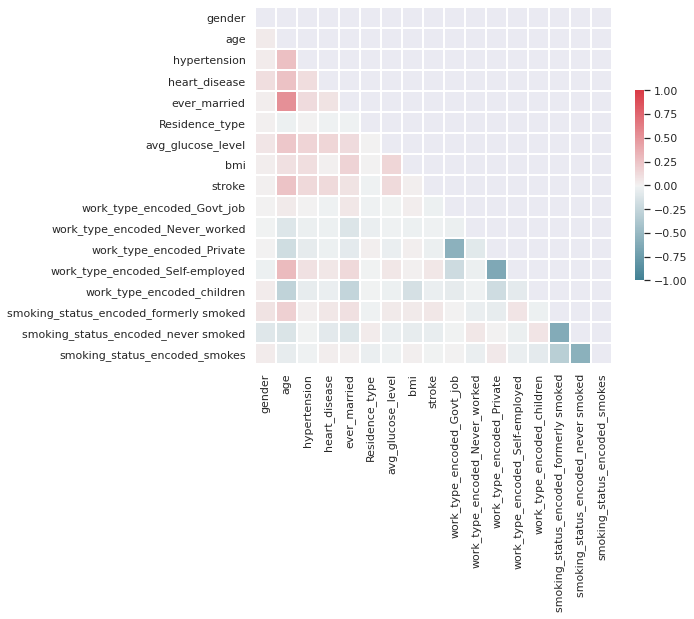

In [ ]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

#Modelowanie danych

##Podział na train i test

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['stroke'],axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2805, 16) (2805,)
(702, 16) (702,)


In [ ]:
y_train.head()

3421    0
4692    0
4423    0
4741    0
3469    0
Name: stroke, dtype: int64

In [ ]:
print("'1': {}".format(sum(y_train==1)))
print("'0': {} \n".format(sum(y_train==0)))


'1': 161
'0': 2644 



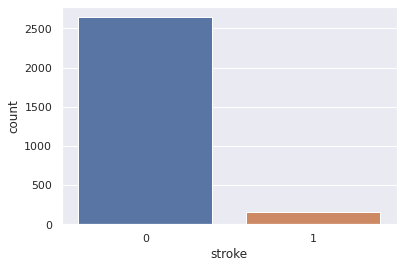

In [ ]:
sns.countplot(x=y_train)

##Niezbalansowane dane

Jak widać na wykresie, dane są mocno niezbalansowane. Aby uzyskać lepsze wyniki, należy je zbalanować.

In [ ]:
from imblearn.over_sampling import SMOTE
print("Przed zbalansowaniem y=1: {}".format(sum(y_train==1)))
print("Przed zbalansowaniem y=0: {} \n".format(sum(y_train==0)))
print("Przed zbalansowaniem X.shape i Y.shape: '0': {}, {} \n".format(X_train.shape, y_train.shape ))
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print('Po zbalansowaniu y=1: {}'.format(sum(y_train_res==1)))
print('Po zbalansowaniu y=0: {}'.format(sum(y_train_res==0)))
print('Po zbalansowaniu X.shape i Y.shape: {}, {} \n'.format(X_train_res.shape, y_train_res.shape))


Przed zbalansowaniem y=1: 161
Przed zbalansowaniem y=0: 2644 

Przed zbalansowaniem X.shape i Y.shape: '0': (2805, 16), (2805,) 

Po zbalansowaniu y=1: 2644
Po zbalansowaniu y=0: 2644
Po zbalansowaniu X.shape i Y.shape: (5288, 16), (5288,) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


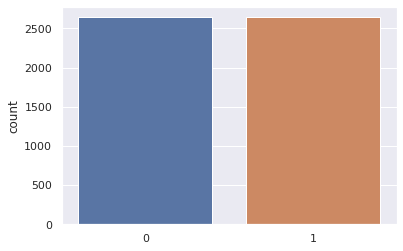

In [ ]:
sns.countplot(x=y_train_res)